# LINEAR REGRESSION IMPLEMENTATION  

### Problem Statement : 

The problem that we are going to solve here is that given a set of features that describe a house in Boston, our machine learning model must predict the house price. To train our machine learning model with boston housing data, we will be using scikit-learn’s boston dataset.

### Data Collection: 
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.
This is a copy of UCI ML housing dataset.
https://archive.ics.uci.edu/ml/machine-learning-databases/housing/


### Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Importing Data (Boston Housing Dataset)

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [5]:
# The information provided in the dataset is as follows: 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [6]:
# The description about the data is as follows: 
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### In simple terms  :-

* Data :- Independent Variables also known as the x values.
* feature_names :- The column names of the data.
* target :- The target variable or the price of the houses(dependent variable) alse known as y value.
* we are trying to predict the house of price based on all independent features

#### The data  : 

In [7]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


#### The target : 

In [8]:
print(boston.target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

### FEATURES

In [9]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Features Information: 

#### The Boston Housing Dataset

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* **CRIM** - per capita crime rate by town
* **ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS** - proportion of non-retail business acres per town.
* **CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* **NOX** - nitric oxides concentration (parts per 10 million)
* **RM** - average number of rooms per dwelling
* **AGE** - proportion of owner-occupied units built prior to 1940
* **DIS** - weighted distances to five Boston employment centres
* **RAD** - index of accessibility to radial highways
* **TAX** - full-value property-tax rate per 1000 dollars 
* **PTRATIO** - pupil-teacher ratio by town
* **B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* **LSTAT** - % lower status of the population
* **MEDV** - Median value of owner-occupied homes in $1000's

### Preparing Dataframe

In [10]:
df = pd.DataFrame(boston.data , columns = boston.feature_names)

In [11]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Creating Output Feature > 'Price'

In [12]:
df['Price'] = boston.target

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Sample Data

In [14]:
df.sample(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
277,0.06127,40.0,6.41,1.0,0.447,6.826,27.6,4.8628,4.0,254.0,17.6,393.45,4.16,33.1
394,13.35980,0.0,18.10,0.0,0.693,5.887,94.7,1.7821,24.0,666.0,20.2,396.90,16.35,12.7
111,0.10084,0.0,10.01,0.0,0.547,6.715,81.6,2.6775,6.0,432.0,17.8,395.59,10.16,22.8
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50,23.0
357,3.84970,0.0,18.10,1.0,0.770,6.395,91.0,2.5052,24.0,666.0,20.2,391.34,13.27,21.7
303,0.10000,34.0,6.09,0.0,0.433,6.982,17.7,5.4917,7.0,329.0,16.1,390.43,4.86,33.1
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58,23.1
442,5.66637,0.0,18.10,0.0,0.740,6.219,100.0,2.0048,24.0,666.0,20.2,395.69,16.59,18.4
315,0.25356,0.0,9.90,0.0,0.544,5.705,77.7,3.9450,4.0,304.0,18.4,396.42,11.50,16.2
88,0.05660,0.0,3.41,0.0,0.489,7.007,86.3,3.4217,2.0,270.0,17.8,396.90,5.50,23.6


# EDA

### Basic Info about data

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


__Observation:__  
* The datafeame has 14 rows where the rows from 0 to 12 are Independent Features and 1 dependent Feature -'Price'.
* All the Features have float datatype and are Numerical. 
* The memory usage is 55.5 KB . 

### Statistical Description

In [16]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Checking for missing Values

In [17]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

##### Observation: 
There are no null values in the dataset

## Univariate analysis : 

#### variance in the variables: 

In [18]:
df.var()

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
Price         84.586724
dtype: float64

### Kernal Density Estimator plot for each feature

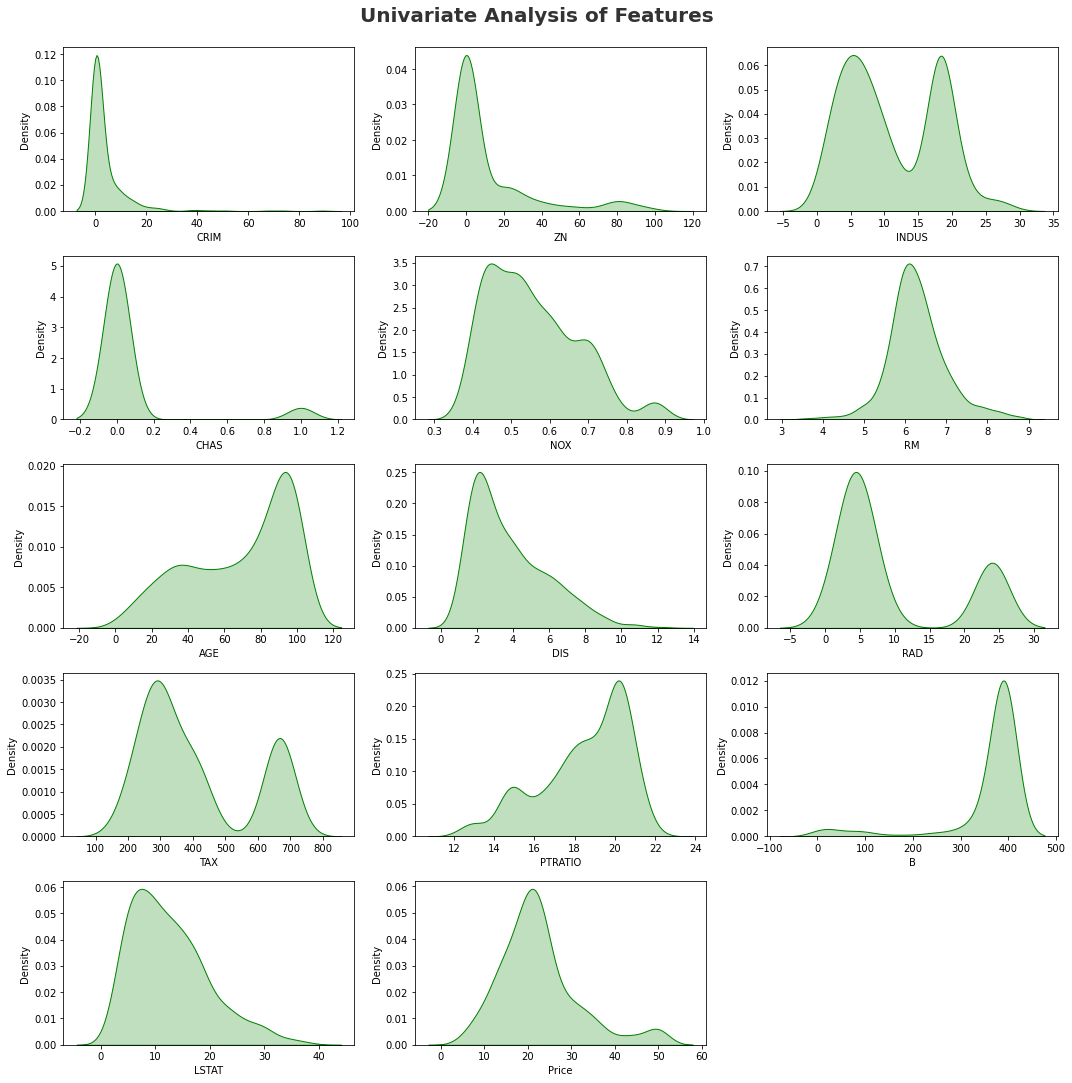

In [19]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for item in range(0,len(df.columns)):
    plt.subplot(5, 3 , item+1)
    sns.kdeplot(x=df[df.columns[item]],shade=True, color='g')
    plt.xlabel(df.columns[item])
    plt.tight_layout()


__Observation:__  
   * Most of the features have approx normal distribution 
   * Features - CRIM , ZN , CHAS , NDS , LSTAT and Price are positively skewed
   * Features - B and Age  are negatively skewed
   * Features- TAX , RAD, CHAS , INDUS are BIMODAL
   * features PTRATION , NOX and Age have non normal distribution  
   
   ### Scatter plot for trends: 

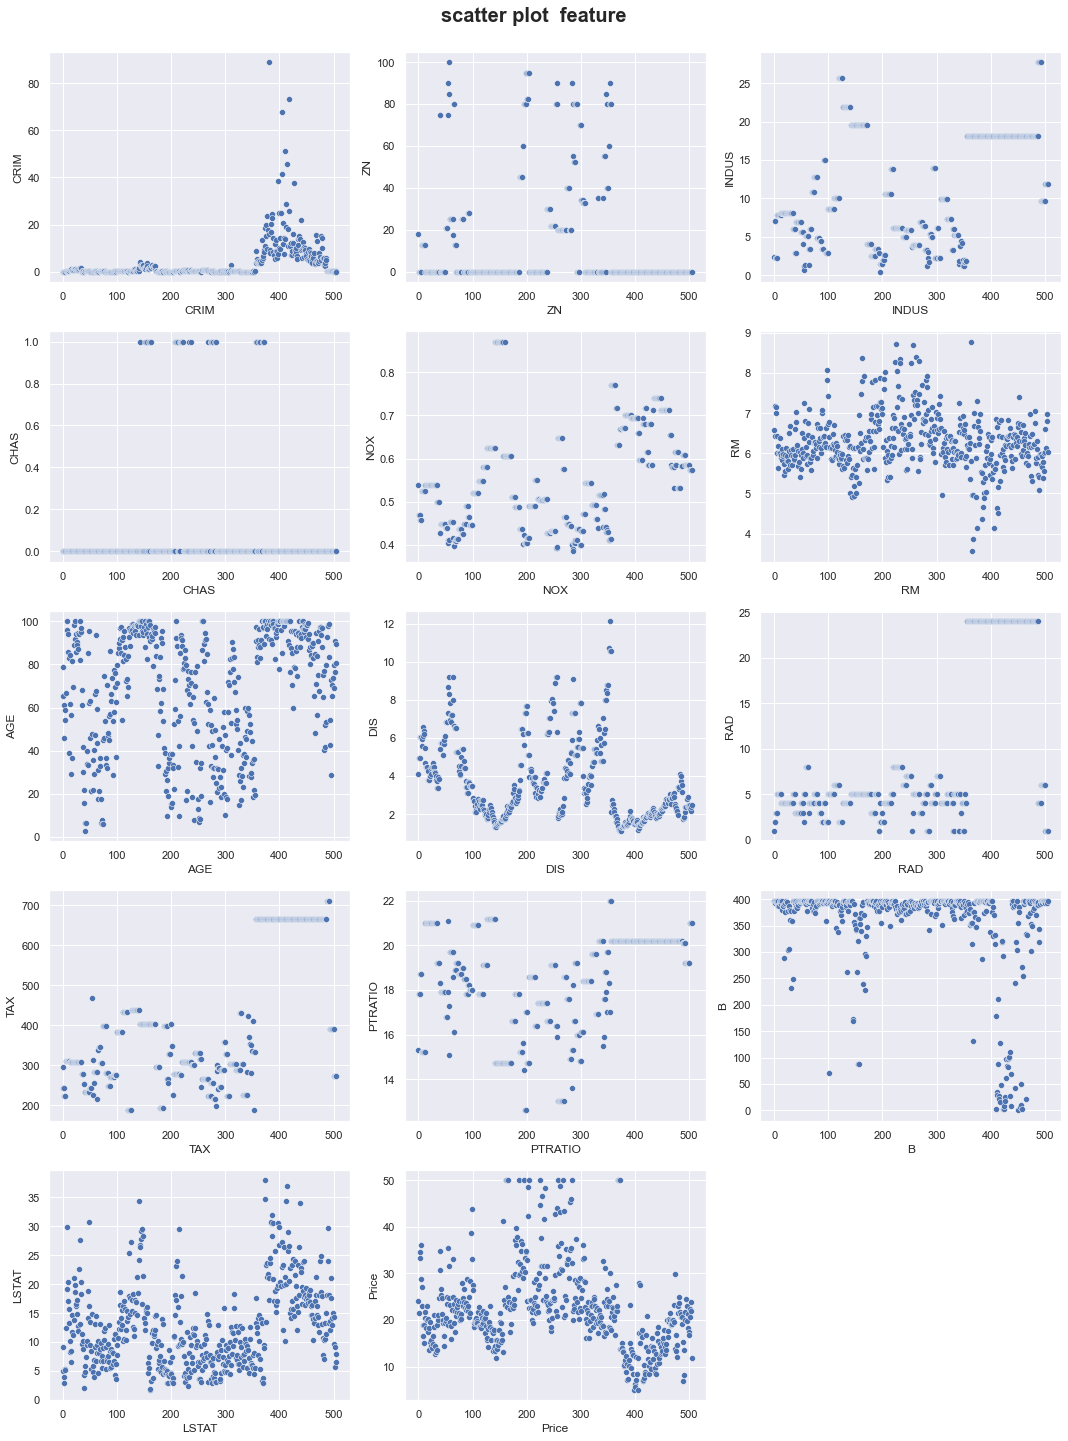

In [93]:
plt.figure(figsize=(15, 20))
plt.suptitle('scatter plot  feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.scatterplot(y=df[df.columns[i]], x=df.index, data=df )
    plt.xlabel(df.columns[i])
    plt.tight_layout()

## Bivariate analysis:  

#### Correlation between features

In [21]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


### Pairplot

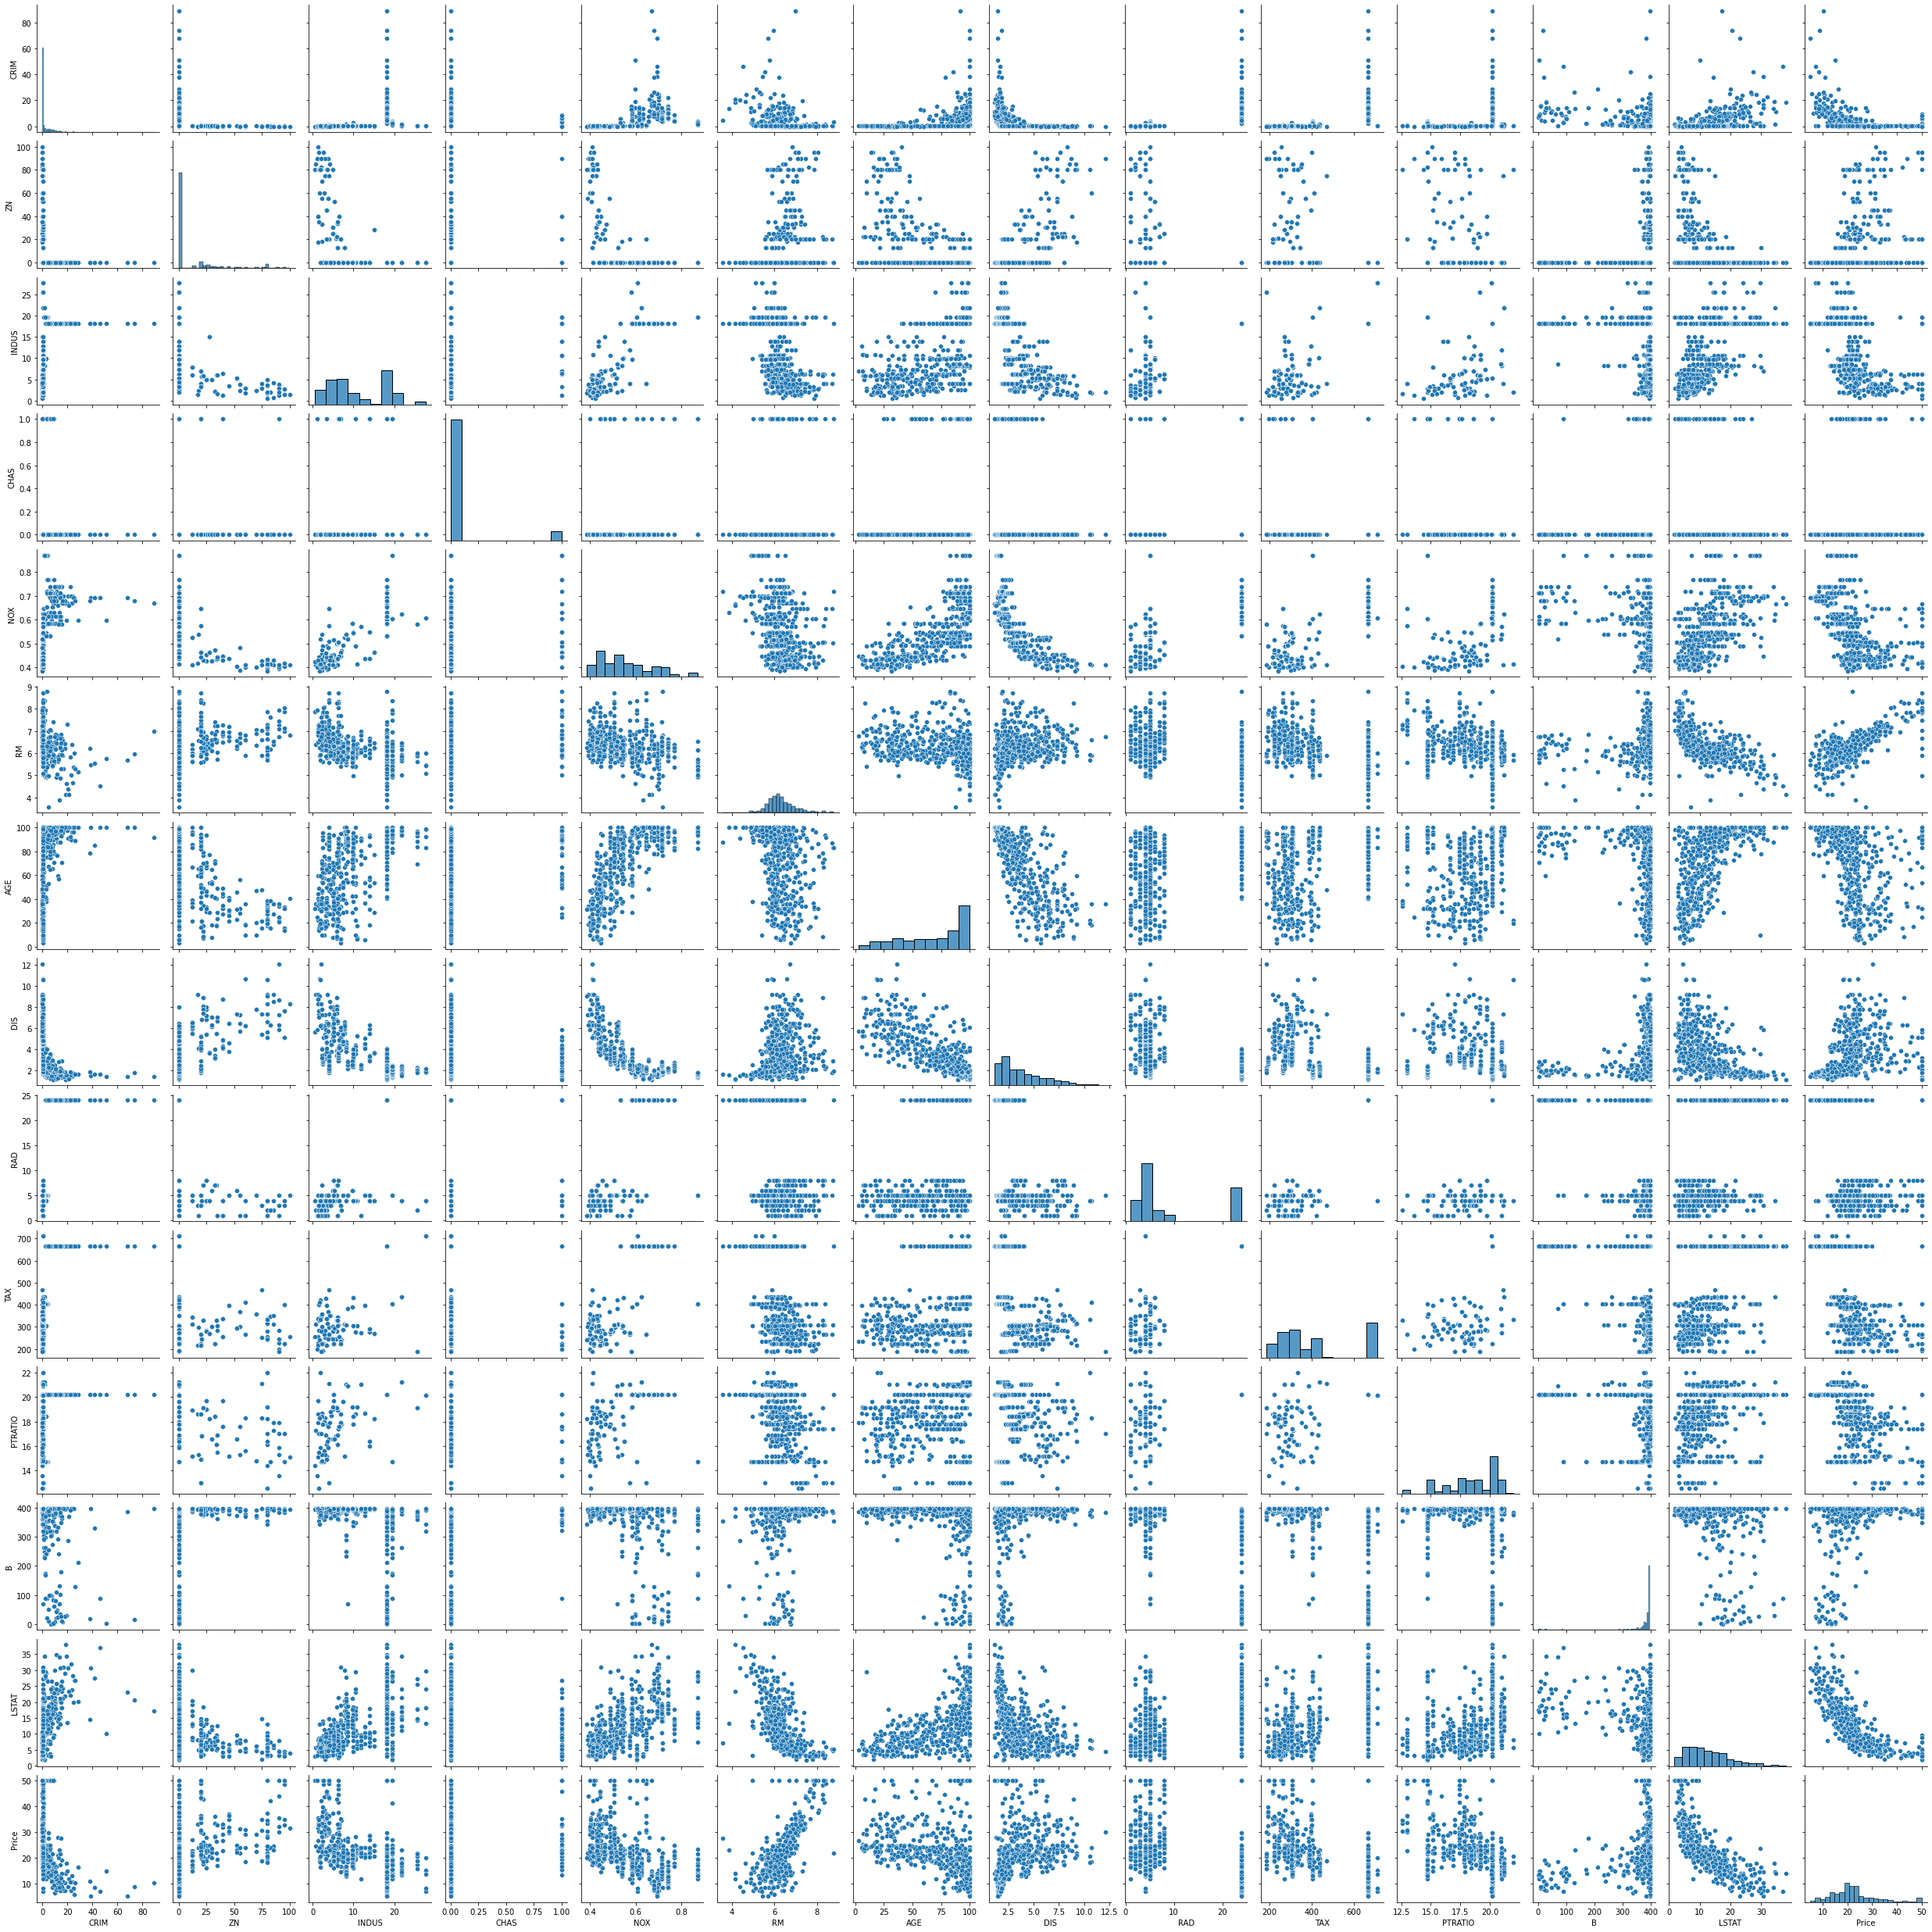

In [22]:
sns.pairplot(df)

### Heatmap for correlation

<AxesSubplot:>

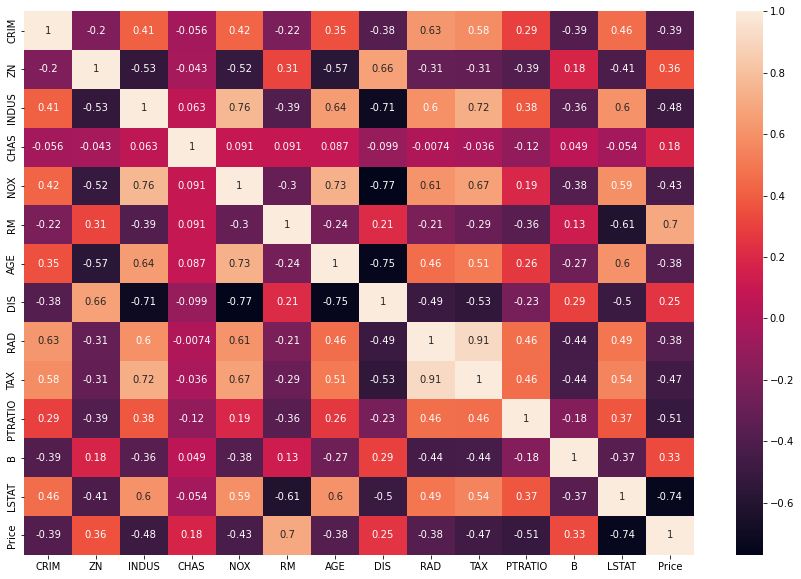

In [23]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr() , annot =True)

### Regression Plot for some Features: 

<AxesSubplot:xlabel='RM', ylabel='Price'>

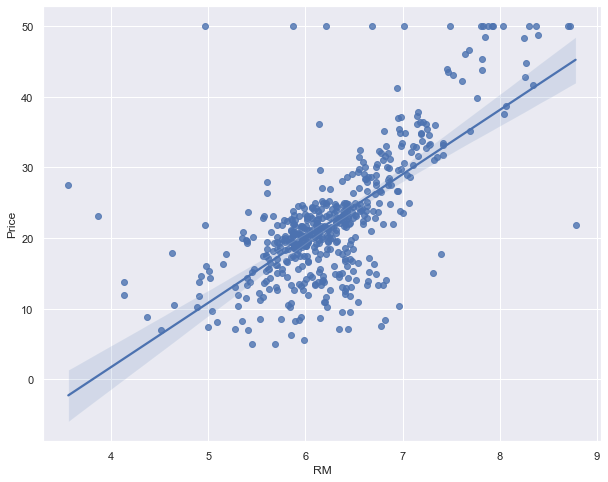

In [90]:
sns.regplot(x = "RM" , y ="Price" , data = df)
# This shaded region is ridge lasso region

<AxesSubplot:xlabel='LSTAT', ylabel='Price'>

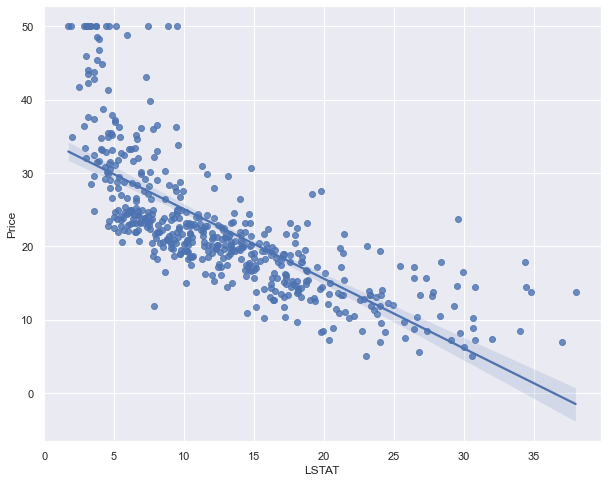

In [91]:
sns.regplot(x = "LSTAT" , y ="Price" , data = df)

<AxesSubplot:xlabel='CRIM', ylabel='Price'>

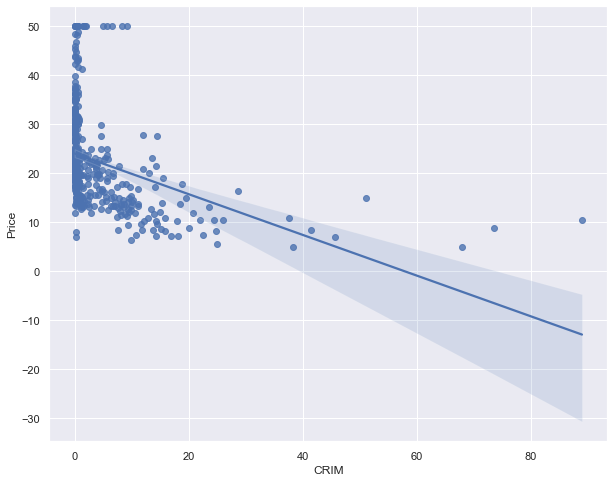

In [92]:
sns.regplot(x = "CRIM" , y ="Price" , data = df)

### Outliers in the data

<AxesSubplot:>

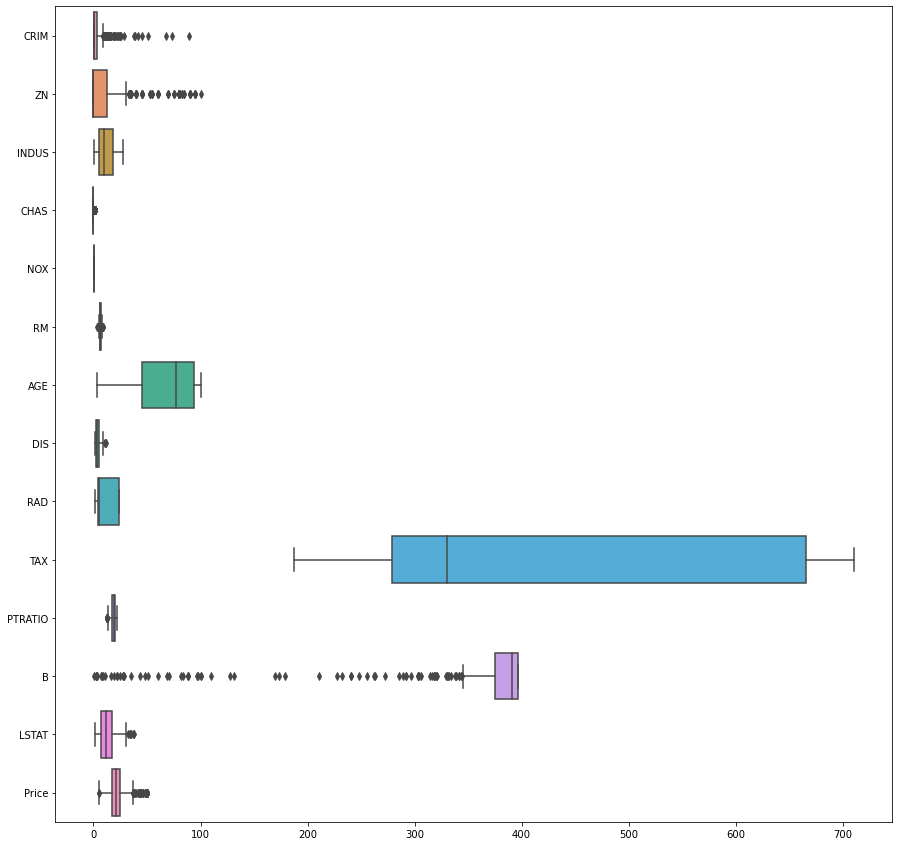

In [27]:
plt.figure(figsize=(15,15))
sns.boxplot(data = df , orient = "h")

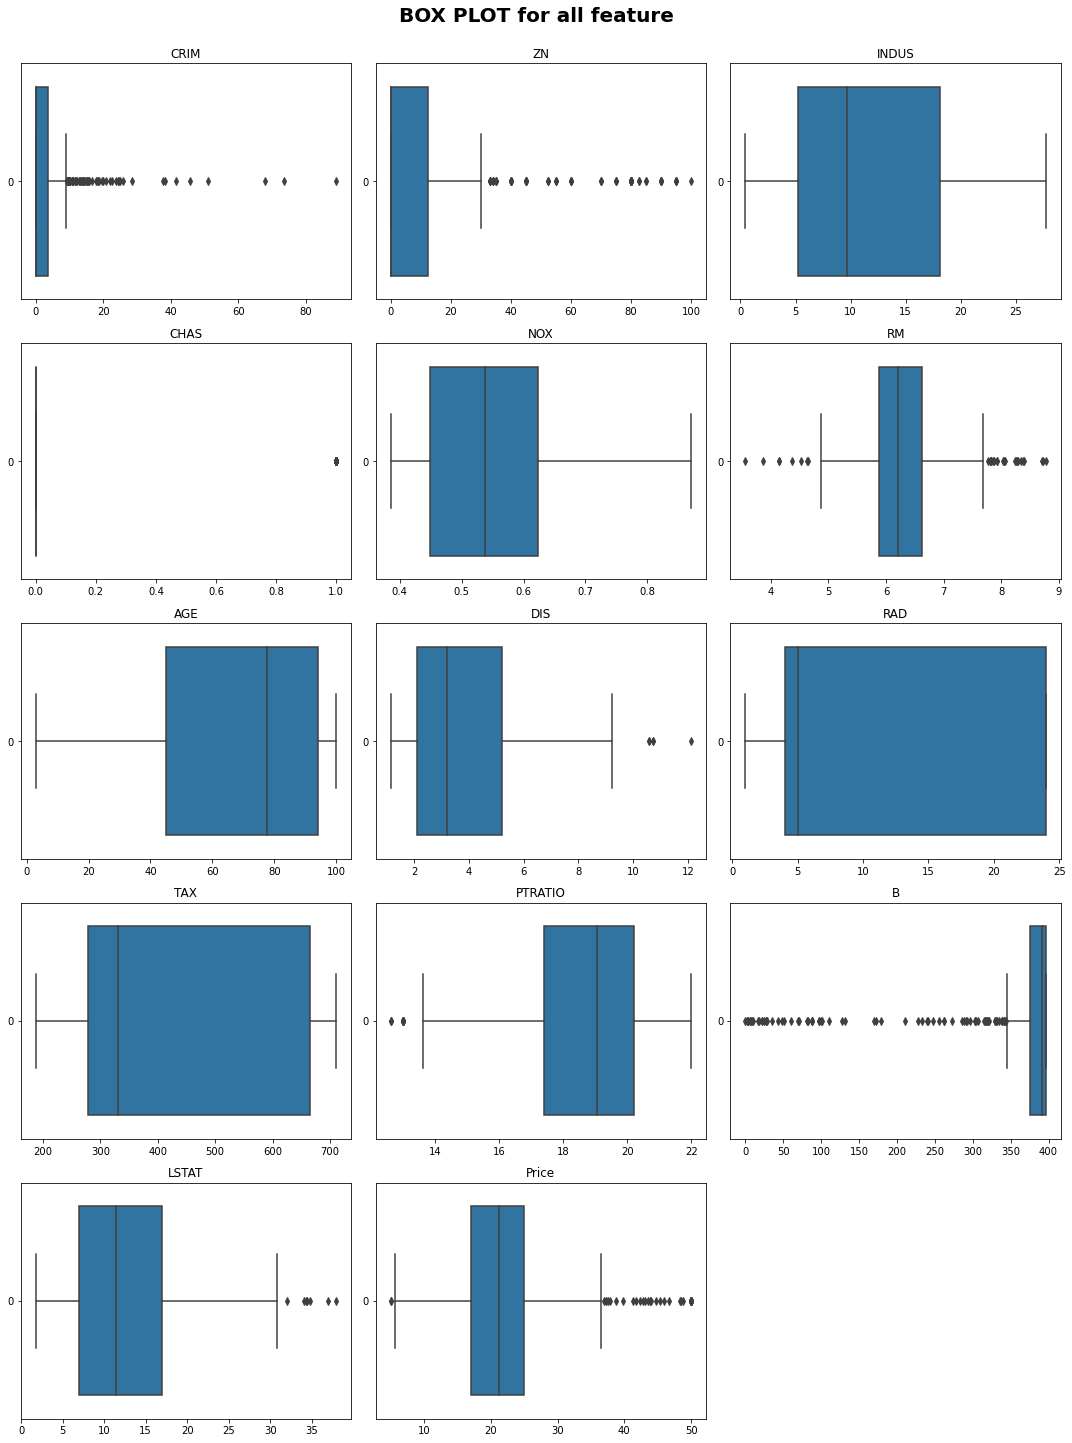

In [28]:
plt.figure(figsize=(15, 20))
plt.suptitle('BOX PLOT for all feature', fontsize=20, fontweight='bold', alpha=1, y=1)

for i in range(0, len(df.columns)):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=df[df.columns[i]] , orient = 'h' )
    plt.title(label = df.columns[i])
    plt.tight_layout()

__Observation:__  
* CRIM , ZN , RM , B , Price feature haev a large number of outliers.
* LSTAT , PTRATIO , DIS , CHAS columns have very less outliers. 
* INDUS, NOX , AGE , RAD have no outliers .


## TRAINING THE MODEL 


#### Seperating Independent and dependent Features

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
# indep and dep features

In [31]:
x= df.iloc[:,:-1]
y=df.iloc[:,-1]

In [32]:
y  # we usually have a series as dependent fearure and dataframe as independent feature

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

So we have x as independent features as dataframe and y == Price which is dependent Feature and is in series form.  

### Splitting The Training and Testing Data 

In [33]:
# we split data in train and test dataset   using  sklearn:  train_test_split

In [34]:
from sklearn.model_selection import train_test_split

In [36]:
# now split using this syntax

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)



* test size tells how much percent of data will go to test data
* random_state is for randomization
* x_train is the indep train data , y_train is its corresponding training data
* x_test and y_test are data to be tested upon.

#### Viewing splitted data

In [37]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
478,10.23300,0.0,18.10,0.0,0.614,6.185,96.7,2.1705,24.0,666.0,20.2,379.70,18.03
26,0.67191,0.0,8.14,0.0,0.538,5.813,90.3,4.6820,4.0,307.0,21.0,376.88,14.81
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
492,0.11132,0.0,27.74,0.0,0.609,5.983,83.5,2.1099,4.0,711.0,20.1,396.90,13.35
108,0.12802,0.0,8.56,0.0,0.520,6.474,97.1,2.4329,5.0,384.0,20.9,395.24,12.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [38]:
y_train

478    14.6
26     16.6
7      27.1
492    20.1
108    19.8
       ... 
106    19.5
270    21.1
348    24.5
435    13.4
102    18.6
Name: Price, Length: 339, dtype: float64

In [39]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
265,0.76162,20.0,3.97,0.0,0.647,5.560,62.8,1.9865,5.0,264.0,13.0,392.40,10.45
29,1.00245,0.0,8.14,0.0,0.538,6.674,87.3,4.2390,4.0,307.0,21.0,380.23,11.98


In [40]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
110    21.7
321    23.1
265    22.8
29     21.0
262    48.8
Name: Price, Length: 167, dtype: float64

#### Shape of splitted data

In [41]:
print(X_train.shape , y_train.shape , X_test.shape , y_test.shape)

(339, 13) (339,) (167, 13) (167,)


#### STANDARDIZATION

In [42]:
## standardize the dataset
## With standardization we reach the global minima faster

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [43]:
scaler   # object of StandardScaler()

StandardScaler()

### Fitting the train and test data

In [44]:
X_train=scaler.fit_transform(X_train)     #we fit and transform the training data
X_test=scaler.transform(X_test)   

# we only  transorm in test and not fit_transorm because to avoid data leakage

### The fitted Data is: 

In [45]:
X_train

array([[ 0.89624872, -0.51060139,  0.98278223, ...,  0.86442095,
         0.24040357,  0.77155612],
       [-0.34895881, -0.51060139, -0.44867555, ...,  1.22118698,
         0.20852839,  0.32248963],
       [-0.41764058,  0.03413008, -0.48748013, ..., -1.36536677,
         0.43481957,  0.92775316],
       ...,
       [-0.43451148,  2.97567999, -1.32968321, ..., -0.56264319,
         0.36745216, -0.90756208],
       [ 1.01703049, -0.51060139,  0.98278223, ...,  0.86442095,
        -2.80977992,  1.50233514],
       [-0.40667333, -0.51060139, -0.38831288, ...,  1.17659123,
        -3.25117205, -0.26046005]])

In [46]:
X_test

array([[-0.42451319, -0.51060139, -1.03649306, ..., -0.74102621,
         0.41899501, -0.48220406],
       [-0.42911576,  1.2325393 , -0.6973123 , ..., -0.29506866,
         0.43481957, -1.25063772],
       [-0.42269508, -0.51060139,  2.36824941, ...,  0.8198252 ,
         0.35807046,  0.77713459],
       ...,
       [-0.33727525,  0.36096896, -1.04799071, ..., -2.34647337,
         0.38395492, -0.28556314],
       [-0.30591027, -0.51060139, -0.44867555, ...,  1.22118698,
         0.2463943 , -0.07218683],
       [-0.36872487,  0.36096896, -1.04799071, ..., -2.34647337,
         0.32133488, -0.91871901]])

## Model Training  

In [47]:

from sklearn.linear_model import LinearRegression
regression=LinearRegression()  # object for linear_reg so it will have all features
regression  # object of linear regression

LinearRegression()

To find regression line: 

In [48]:
regression.fit(X_train,y_train)   # here we not need to transform as already done so only fit

LinearRegression()

#### Regression Coefficients

In [49]:
print(regression.coef_)

[-0.98858032  0.86793276  0.40502822  0.86183791 -1.90009974  2.80813518
 -0.35866856 -3.04553498  2.03276074 -1.36400909 -2.0825356   1.04125684
 -3.92628626]


#### Intercept

In [50]:
print(regression.intercept_)

22.970796460176988


### Predicting test

In [51]:
# prediction for test data
reg_pred = regression.predict(X_test)

The predicted data is as follows: 

In [52]:
reg_pred

array([28.53469469, 36.6187006 , 15.63751079, 25.5014496 , 18.7096734 ,
       23.16471591, 17.31011035, 14.07736367, 23.01064388, 20.54223482,
       24.91632351, 18.41098052, -6.52079687, 21.83372604, 19.14903064,
       26.0587322 , 20.30232625,  5.74943567, 40.33137811, 17.45791446,
       27.47486665, 30.2170757 , 10.80555625, 23.87721728, 17.99492211,
       16.02608791, 23.268288  , 14.36825207, 22.38116971, 19.3092068 ,
       22.17284576, 25.05925441, 25.13780726, 18.46730198, 16.60405712,
       17.46564046, 30.71367733, 20.05106788, 23.9897768 , 24.94322408,
       13.97945355, 31.64706967, 42.48057206, 17.70042814, 26.92507869,
       17.15897719, 13.68918087, 26.14924245, 20.2782306 , 29.99003492,
       21.21260347, 34.03649185, 15.41837553, 25.95781061, 39.13897274,
       22.96118424, 18.80310558, 33.07865362, 24.74384155, 12.83640958,
       22.41963398, 30.64804979, 31.59567111, 16.34088197, 20.9504304 ,
       16.70145875, 20.23215646, 26.1437865 , 31.12160889, 11.89

## Assumptions in linear regression

### 1. Linear Relationship

Linear relationship: There exists a linear relationship between the independent variable, x, and the dependent variable, y.
Here we want linear relationship between y_test which is the actual test data and reg_pred which is the predicted data.
Visually it can be check by making a scatter plot between dependent and independent variable

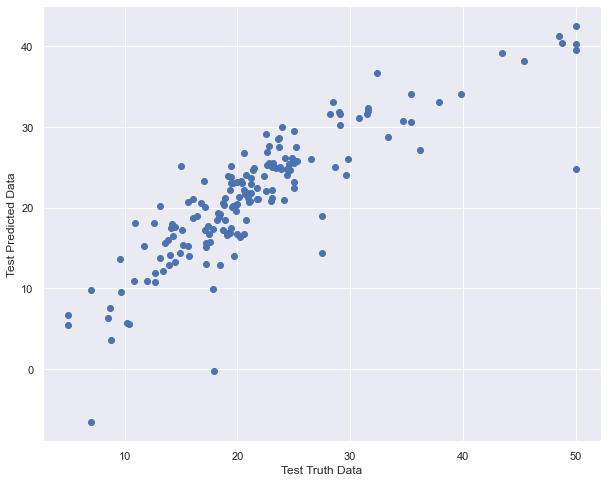

In [89]:
plt.scatter(y_test,reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
sns.set(rc={'figure.figsize':(10,8)})

We can clearly see a __Linear Relation__ between the Test and predicted data , which tells our model is fitted correctly and the linearity assumption holds

### 2. Residuals  
Residual = actual - predicted , it is also called Error
Residuals as we know are the differences between the true value and the predicted value. 
* One of the assumptions of linear regression is that the mean of the residuals should be approx zero as in Normal Dist. 
* Also the distribution plot of residuals should be Normal
* The qq plot should be a straight line

In [54]:
# Finding Residuals
residuals=y_test-reg_pred

In [55]:
residuals   # these all are errors

173   -4.934695
274   -4.218701
491   -2.037511
72    -2.701450
452   -2.609673
         ...   
110    0.642557
321   -1.917346
265   -4.854619
29     0.297942
262    8.417851
Name: Price, Length: 167, dtype: float64

#### Check if  mean is Zero:

In [56]:
np.mean(residuals)

0.20231610858010818

Clearly the mean is near to zero , so no problem here

#### Check for normal dist:

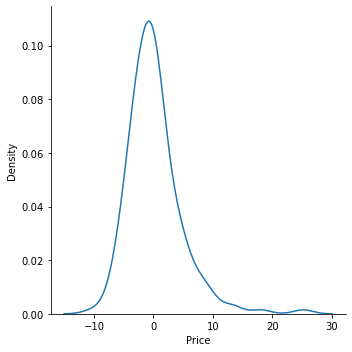

In [57]:
# create kde plot for errors
sns.displot(residuals,kind = "kde")

The residuals are approx normally distributed  
this graph is guassian and slighly skewed positive, so can perform ridge lasso 

#### Check qq plot:

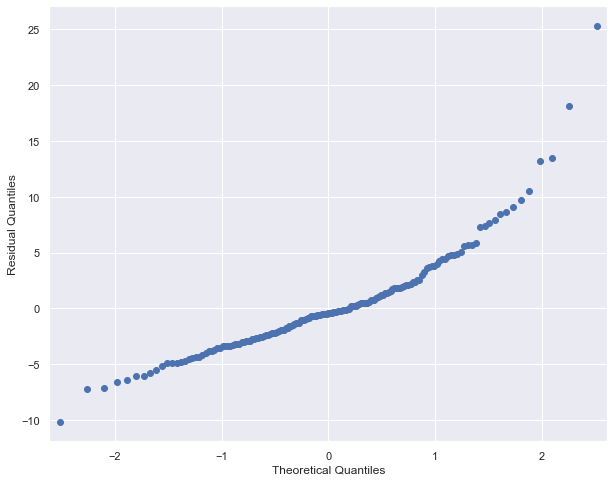

In [88]:
import statsmodels.api as sm
sm.qqplot(residuals, ylabel = "Residual Quantiles" )
sns.set(rc={'figure.figsize':(10,8)})

we see an __approx straight line__ which tells us this Assumption is satisfied 

### 3. Homoscedasticity

Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. By plotting the error terms with predicted terms we can check that there should not be any pattern in the error term  
Visually they should have no trend in the plot and have a uniform like distribution of data

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

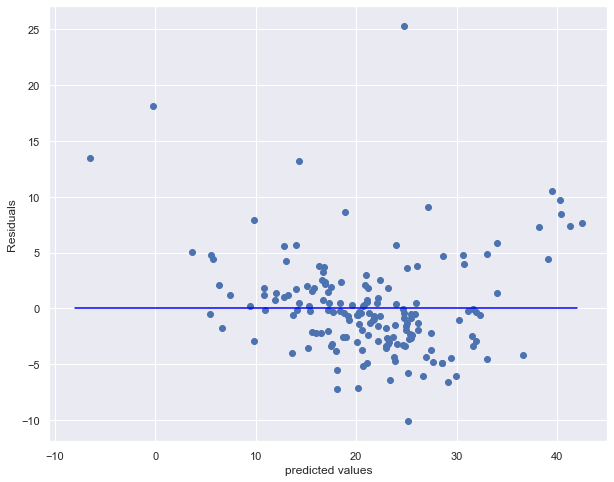

In [87]:
sns.set(rc={'figure.figsize':(10,8)})
plt.scatter(reg_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

We can observe there is __No trend or pattern__ in the plot so this assumption is satisfied

### 4. No Autocorrelation of residuals

When the residuals are autocorrelated, it means that the current value is dependent of the previous (historic) values and that there is a definite unexplained pattern in the Y variable that shows up in the error terms. Though it is more evident in time series data.  
  
In plain terms autocorrelation takes place when there's a pattern in the rows of the data. This is usual in time series data as there is a pattern of time for eg. Week of the day effect which is a very famous pattern seen in stock markets where people tend to buy stocks more towards the beginning of weekends and tend to sell more on Mondays. There's been great study about this phenomenon and it is still a matter of research as to what actual factors cause this trend.
  
There should not be autocorrelation in the data so the error terms should not form any pattern.  

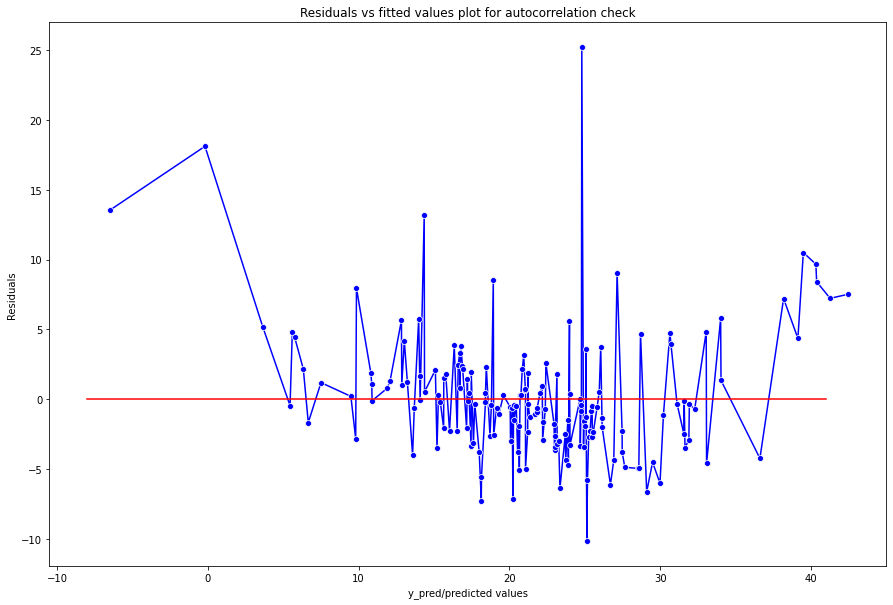

In [60]:
plt.figure(figsize=(15,10))
p = sns.lineplot(reg_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-8,41],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

No pattern indicates no autocorrelation

## Performance Metrics For Regression

To evaluate the performance or quality of the model, different metrics are used, and these metrics are known as performance metrics or evaluation metrics.
To evaluate the performance of a classification model, different metrics are used, and some of them are as follows:
Following are the popular metrics that are used to evaluate the performance of Regression models.

* Mean Absolute Error(MAE)
* Mean Squared Error(MSE)
* Root Mean Squared Error(RMSE)
* R2  or R Squared Score
* Adjusted R2

### Checking MSE , MAE and RMSE

In [61]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(" The mean squared error is : " , mean_squared_error(y_test,reg_pred))
print(" The mean Absolute error is : " ,mean_absolute_error(y_test,reg_pred))
print(" The root mean squared error is : " , np.sqrt(mean_squared_error(y_test,reg_pred)))

 The mean squared error is :  20.72402343733975
 The mean Absolute error is :  3.1482557548168324
 The root mean squared error is :  4.552364598463061


### R squared and adjusted R squared

In [62]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(" The R Squared score is : " , score)

 The R Squared score is :  0.7261570836552478


Therefore R squared is 71.65%

In [63]:
#display adjusted R-squared
r2adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R2 Score is:  " , r2adj_score)

The Adjusted R2 Score is:   0.7028893848808571


# Ridge Regression Model

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values. 

In [64]:
from sklearn.linear_model import Ridge

In [65]:
ridge=Ridge()

In [66]:
ridge

Ridge()

#### Fitting the Ridge model:

In [68]:
ridge.fit(X_train,y_train)

Ridge()

### Ridge Regression Coefficients and Intercept

In [71]:
print("The ridge regression Coefficient for indepent features is : " , ridge.coef_)
print("The ridge Intercept  is : " , ridge.intercept_)

The ridge regression Coefficient for indepent features is :  [-0.97541551  0.84608896  0.37564928  0.86738391 -1.86077739  2.81535042
 -0.36108635 -3.00177053  1.95063015 -1.29462251 -2.06972563  1.03867858
 -3.91121554]
The ridge Intercept  is :  22.970796460176988


### prediction for test data:

In [72]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([28.50742044, 36.56623172, 15.74385228, 25.49107605, 18.70449805,
       23.16555674, 17.3353633 , 14.11553585, 22.94790581, 20.56605905,
       24.89034838, 18.45231813, -6.44592912, 21.85588536, 19.15767075,
       26.02049072, 20.20418625,  5.75334034, 40.26109346, 17.45757103,
       27.43625   , 30.15008183, 10.86542778, 23.8922577 , 17.98002216,
       15.97783016, 23.27084129, 14.39145132, 22.39046559, 19.33913789,
       22.14761798, 25.0633962 , 25.12323651, 18.44886131, 16.56498494,
       17.51980787, 30.71926279, 20.06321173, 24.0051703 , 24.93961773,
       14.01804472, 31.55716108, 42.36411402, 17.74514996, 26.92815913,
       17.13671991, 13.73088718, 26.14522758, 20.23784138, 30.01688815,
       21.23834632, 33.98097943, 15.46847103, 25.98238451, 39.0872846 ,
       22.93270116, 18.79729577, 32.98900997, 24.75121546, 12.88534635,
       22.44620063, 30.6177806 , 31.5496446 , 16.3728183 , 21.07398052,
       16.71642532, 20.21399742, 26.13275151, 31.06390949, 11.90

## Checking Assumptions for Ridge model:


##### 1. Linearity

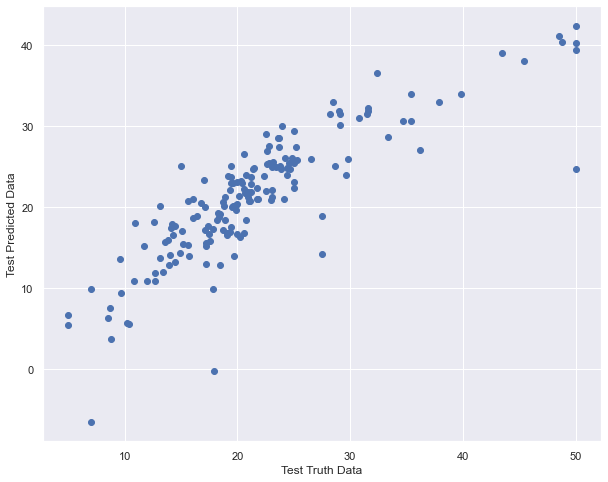

In [85]:
plt.scatter(y_test,ridge_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")
sns.set(rc={'figure.figsize':(10,8)})

We can see a linear trend here so this assumption is satisfied  

##### 2. Residuals

In [74]:
residuals=y_test- ridge_pred
residuals

173   -4.907420
274   -4.166232
491   -2.143852
72    -2.691076
452   -2.604498
         ...   
110    0.612742
321   -1.920144
265   -4.804533
29     0.250849
262    8.445592
Name: Price, Length: 167, dtype: float64

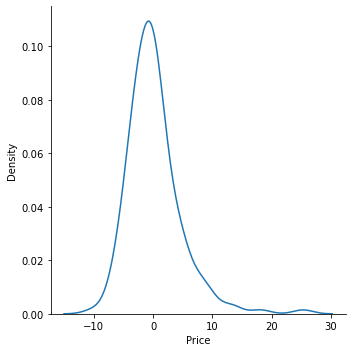

In [75]:
sns.displot(residuals,kind="kde")

Since the plot for residuals is approximately Normal so we can say that this assumption is also satisfied.  

##### 3. Homoscedasticity

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

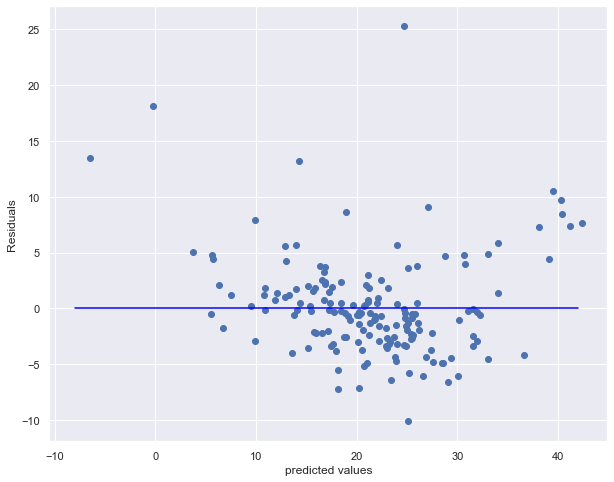

In [94]:
plt.scatter(ridge_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

We see no pattern here and data is Uniformly distributed.hence this assumption is Satisfied   

##### 4.  No Autocorr

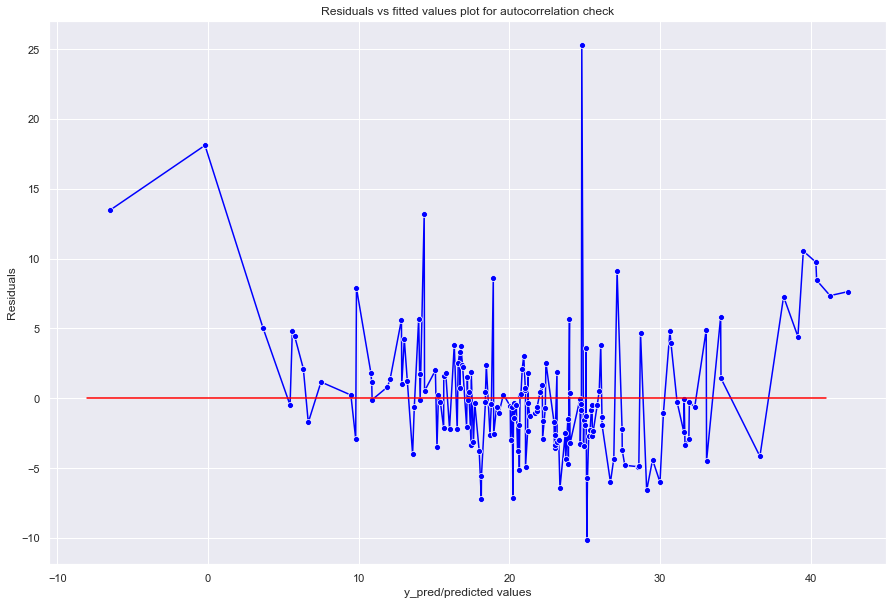

In [95]:
plt.figure(figsize=(15,10))
p = sns.lineplot(reg_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-8,41],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

There is no pattern so no auto corr. between indep and dep Features. 

## Performance Metrics

##### MAE, MSE , RMSE:

In [97]:
print(" The mean squared error is : " , mean_squared_error(y_test,ridge_pred))
print(" The mean Absolute error is : " ,mean_absolute_error(y_test,ridge_pred))
print(" The root mean squared error is : " , np.sqrt(mean_squared_error(y_test,ridge_pred)))

 The mean squared error is :  20.752416320800354
 The mean Absolute error is :  3.1460114626616966
 The root mean squared error is :  4.555482007515819


##### R2 and Adjusted R2

In [98]:
score=r2_score(y_test,ridge_pred)
print(" The R Squared score is : " , score)

 The R Squared score is :  0.7257819060246202


In [99]:
#display adjusted R-squared
r2adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R2 Score is:  " , r2adj_score)

The Adjusted R2 Score is:   0.702482329412333


# Lasso Regression Model

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). This particular type of regression is well-suited for models showing high levels of muticollinearity or when you want to automate certain parts of model selection, like variable selection/parameter elimination.  
   
The acronym “LASSO” stands for Least Absolute Shrinkage and Selection Operator.  
  
Lasso regression performs L1 regularization, which adds a penalty equal to the absolute value of the magnitude of coefficients. This type of regularization can result in sparse models with few coefficients; Some coefficients can become zero and eliminated from the model.  

In [100]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso

Lasso()

In [102]:
lasso.fit(X_train,y_train)

Lasso()

### Coefficient and Intercept:

In [103]:
print("The ridge regression Coefficient for indepent features is : " , lasso.coef_)
print("The ridge Intercept  is : " , lasso.intercept_)

The ridge regression Coefficient for indepent features is :  [-0.          0.         -0.          0.27140271 -0.          2.62932147
 -0.         -0.         -0.         -0.         -1.21106809  0.29872625
 -3.81788375]
The ridge Intercept  is :  22.970796460176988


##### Perdiction 

In [104]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([26.08015466, 30.7480057 , 17.78164882, 25.25224684, 19.28387274,
       22.81161765, 18.31125182, 14.6359243 , 21.41277818, 20.44276659,
       20.7857368 , 21.00978479,  1.29101416, 22.48591111, 20.4207989 ,
       24.73115299, 18.16643043,  6.95747132, 35.82658816, 18.45664358,
       25.66618031, 26.77096265, 13.79601995, 24.00317031, 18.83677575,
       15.53225538, 22.93567982, 18.81410882, 19.96419904, 19.71394554,
       19.9929271 , 25.48086778, 25.07506471, 19.62299031, 15.87164442,
       20.47826644, 30.90020658, 21.73740698, 21.69357896, 24.78795141,
       14.48946282, 27.49872616, 36.28097645, 19.68302782, 25.54695918,
       17.26691093, 16.01035524, 25.87512519, 19.3705841 , 29.52965183,
       23.10173719, 31.37342903, 17.55332715, 25.82107048, 34.98857199,
       22.91267519, 19.3967501 , 29.34678421, 24.65125376, 16.72971658,
       25.42537393, 30.6751849 , 28.90511192, 18.42571639, 27.56426639,
       14.62706882, 20.02272756, 25.60745002, 28.32959623, 15.91

## Checking Assumptions for Lasso model:


##### 1. Linearity

Text(0, 0.5, 'Test Predicted Data')

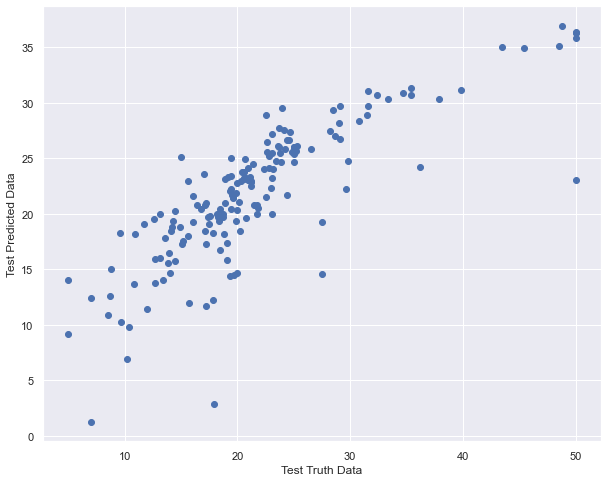

In [105]:
plt.scatter(y_test,lasso_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

We can see a linear trend here so this assumption is satisfied  

##### 2. Residuals

In [106]:
residuals=y_test- lasso_pred
residuals

173    -2.480155
274     1.651994
491    -4.181649
72     -2.452247
452    -3.183873
         ...    
110     0.864934
321    -2.373897
265    -1.335776
29     -2.029446
262    11.896754
Name: Price, Length: 167, dtype: float64

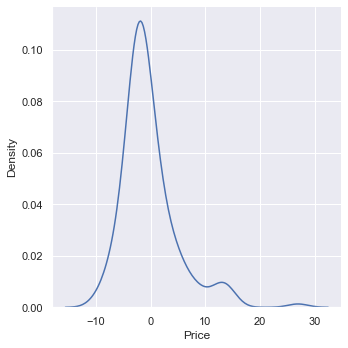

In [107]:
sns.displot(residuals,kind="kde")

Since the plot for residuals is approximately Normal so we can say that this assumption is also satisfied.  

##### 3. Homoscedasticity

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

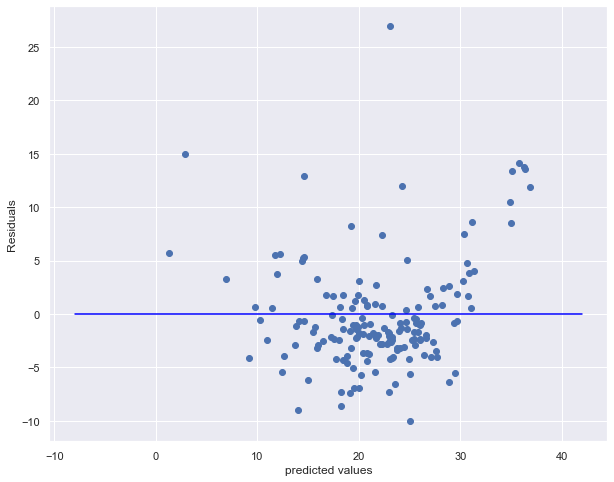

In [108]:
plt.scatter(lasso_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

We see no pattern here and data is Uniformly distributed.hence this assumption is Satisfied   

##### 4.  No Autocorr

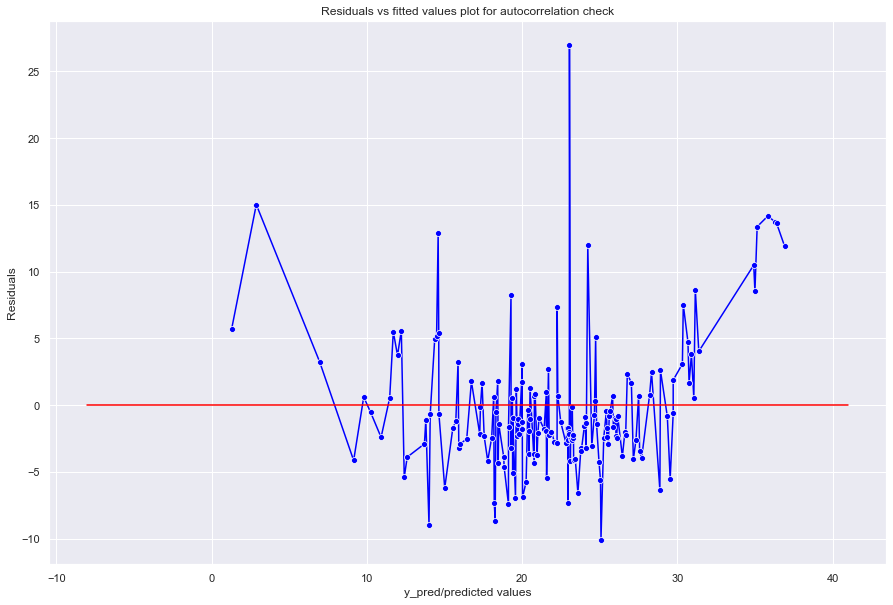

In [109]:
plt.figure(figsize=(15,10))
p = sns.lineplot(lasso_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-8,41],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

There is no pattern so no auto corr. between indep and dep Features. 

## Performance Metrics

##### MAE, MSE , RMSE:

In [110]:
print(" The mean squared error is : " , mean_squared_error(y_test,lasso_pred))
print(" The mean Absolute error is : " ,mean_absolute_error(y_test,lasso_pred))
print(" The root mean squared error is : " , np.sqrt(mean_squared_error(y_test,lasso_pred)))

 The mean squared error is :  26.16637721498099
 The mean Absolute error is :  3.6464026430077423
 The root mean squared error is :  5.11530812512609


##### R2 and Adjusted R2

In [111]:
score=r2_score(y_test,lasso_pred)
print(" The R Squared score is : " , score)

 The R Squared score is :  0.6542429577734992


In [112]:
#display adjusted R-squared
r2adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R2 Score is:  " , r2adj_score)

The Adjusted R2 Score is:   0.6248649084339926


The adjusted R2 Score indicate this is a not so good model

# ElasticNet Regression Model

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.  
Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions.  

In [113]:
from sklearn.linear_model import ElasticNet
elsc = ElasticNet()
elsc

ElasticNet()

#### Fitting the Ridge model:

In [114]:
elsc.fit(X_train,y_train)

ElasticNet()

### ElasticNet Regression Coefficients and Intercept

In [115]:
print("The ridge regression Coefficient for indepent features is : " , elsc.coef_)
print("The ridge Intercept  is : " , elsc.intercept_)

The ridge regression Coefficient for indepent features is :  [-0.36520114  0.         -0.14336748  0.63145824 -0.25193148  2.34999448
 -0.         -0.         -0.         -0.25649969 -1.23951556  0.56384945
 -2.56053213]
The ridge Intercept  is :  22.970796460176988


### prediction for test data:

In [125]:
elsc_pred = elsc.predict(X_test)
elsc_pred

array([26.04802695, 31.11448131, 18.09845158, 24.74715491, 19.13029713,
       23.07195028, 19.8492127 , 16.42921582, 20.98280883, 21.03040905,
       23.59247585, 22.4067143 ,  2.50342106, 22.86968897, 21.05836477,
       23.53088819, 19.32942155,  9.24659633, 34.51755093, 18.33111982,
       25.39963891, 26.53220506, 16.04212388, 23.68595117, 18.22309609,
       15.9070075 , 22.91791506, 17.40135861, 22.80881602, 20.34960072,
       21.28107265, 25.0664737 , 23.29041734, 18.52289666, 16.68946719,
       20.17099878, 29.78000437, 22.08911412, 24.00624402, 24.52109601,
       16.51539744, 27.25142517, 34.8940966 , 20.75229792, 25.54944362,
       17.27877681, 17.51067948, 25.422475  , 19.45141801, 28.72445431,
       23.85816391, 30.64335445, 19.05778782, 25.10137208, 33.43673587,
       21.9368327 , 19.10068361, 28.38705767, 24.91075492, 18.68821158,
       25.41735754, 29.96236233, 27.77368373, 18.66077461, 26.83456776,
       18.72984267, 19.66634919, 25.37569386, 27.64862833, 15.09

## Checking Assumptions for ElasticNet model:


##### 1. Linearity

Text(0, 0.5, 'Test Predicted Data')

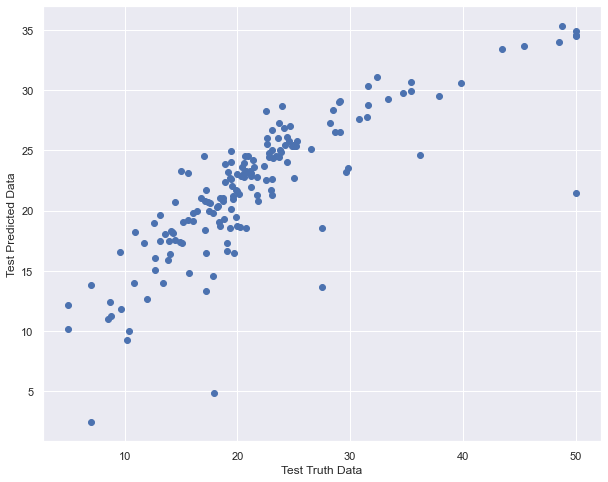

In [126]:
plt.scatter(y_test,elsc_pred) 
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

##### 2. Residuals

In [127]:
residuals=y_test- elsc_pred
residuals

173    -2.448027
274     1.285519
491    -4.498452
72     -1.947155
452    -3.030297
         ...    
110     0.428514
321    -1.920378
265    -1.645018
29     -2.106526
262    13.490268
Name: Price, Length: 167, dtype: float64

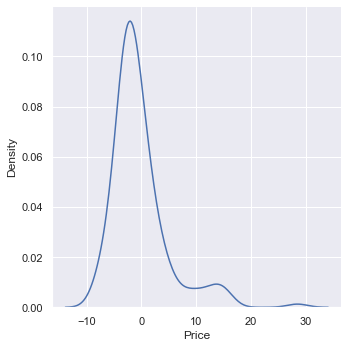

In [128]:
sns.displot(residuals,kind="kde")

##### 3. Homoscedasticity

<AxesSubplot:xlabel='predicted values', ylabel='Residuals'>

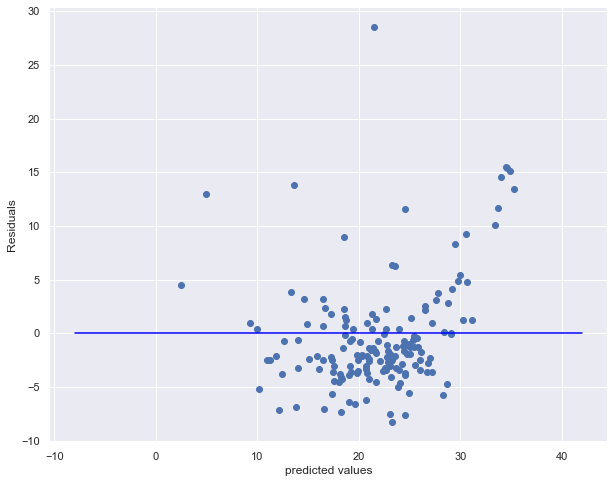

In [129]:
plt.scatter(elsc_pred,residuals)
plt.xlabel('predicted values')
plt.ylabel('Residuals')
sns.lineplot([-8,42],[0,0],color='blue')

##### 4.  No Autocorr

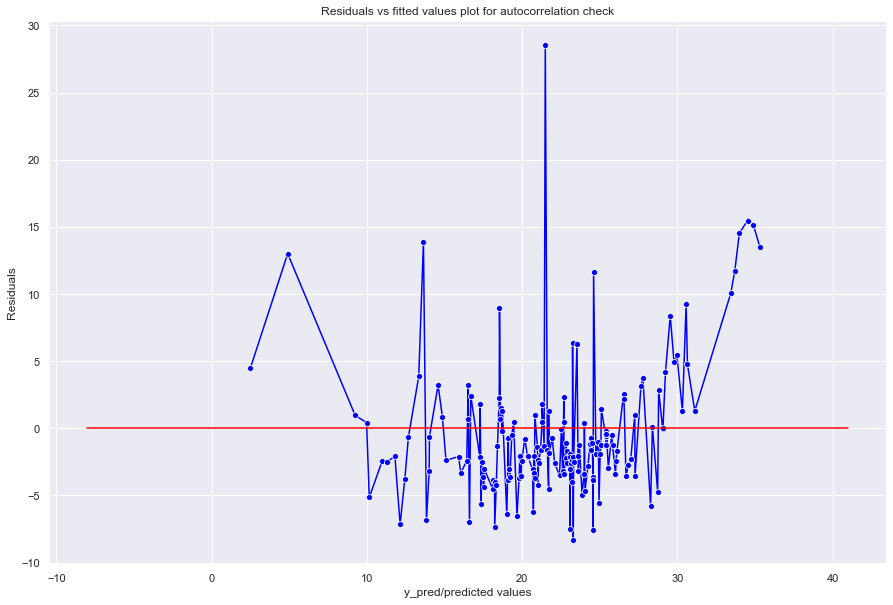

In [130]:
plt.figure(figsize=(15,10))
p = sns.lineplot(elsc_pred,residuals,marker='o',color='blue')
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([-8,41],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

There is no pattern so no auto corr. between indep and dep Features. 

## Performance Metrics

##### MAE, MSE , RMSE:

In [131]:
print(" The mean squared error is : " , mean_squared_error(y_test,elsc_pred))
print(" The mean Absolute error is : " ,mean_absolute_error(y_test,elsc_pred))
print(" The root mean squared error is : " , np.sqrt(mean_squared_error(y_test,elsc_pred)))

 The mean squared error is :  27.140175406489984
 The mean Absolute error is :  3.627745135070299
 The root mean squared error is :  5.209623345932984


##### R2 and Adjusted R2

In [132]:
score=r2_score(y_test,elsc_pred)
print(" The R Squared score is : " , score)

 The R Squared score is :  0.641375391902405


In [133]:
#display adjusted R-squared
r2adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("The Adjusted R2 Score is:  " , r2adj_score)

The Adjusted R2 Score is:   0.610904019972544


We can see that the adjusted R squared score is low so this model is also not recommended.

### THANK YOU 
-performed by: Ankit Dubey